## Twitter User Gender Prediction

This project is based on dataset from kaggle.com, to predict the gender of users based on their profile description. The dataset contains 20,000 rows, each with a user name, profile description, a random tweet, account profile and image, location, and even link and sidebar color. Dataset also included attributes like retweet count, favourite count and total number of tweets. Prediction is whether the user was a male, a female, or a brand (non-individual).

In this project I have compared various datamining model to see which model is giving best accuracy under different conditions. By combining different attributes and by single attributes as well.

In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib
import nltk
from collections import defaultdict

# the Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
# function to split the data for cross-validation
from sklearn.model_selection import train_test_split
# function for transforming documents into counts
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
#to print tables

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import plotly
plotly.tools.set_credentials_file(username='kashishkhare', api_key='3gMVPlFOQbJSTMb95rAd')
import plotly.plotly as py
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

%matplotlib inline

# function for encoding categories
from sklearn.preprocessing import LabelEncoder
d = defaultdict(LabelEncoder)

#getting data from csv file
data = pd.read_csv('gender-classifier.csv',encoding = "ISO-8859-1")




### Data Pre-processing
Data in columns tweet and description were text data. Text data contains a lot of noise which needed to be processed before implementing any data model on them. Below is the function for pre-processing of text data in Tweets and Description column. Removal of white spaces, double spaces, hyperlink, special characters etc.

In [2]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

## Naive Bayes

### Model without removal of stop words

Cleaning data in tweet and description field

In [3]:
data['Tweets'] = [cleaning(s) for s in data['text']]
data['Description'] = [cleaning(s) for s in data['description']]

#### Missing value removal

Code for checking accuracy of Naive Bayes model for combination of features and taking only rows with gender confidence 1 as rest of data has missing target class value.
About 30% of data is not golden so it is ignored.
Train and Test sets are divided into 80% & 20% respectively

Running Naive Bayes model on just one feature at a time. By this model we get the highest accuracy of 62% with the description feature.

In [10]:
Features = ['Tweets','Description','link_color','name','sidebar_color','fav_number','retweet_count','tweet_count']
data_confident1 = data[data['gender:confidence']==1]
data_confident1['all'] = data_confident1['Tweets']
accuracy1={}
encoder = LabelEncoder()
y = encoder.fit_transform(data_confident1['gender'])
for i in range(len(Features)):
    #data_confident1['all'] = data_confident1.filter(Features[i], axis=1)
    if i>4:
        data_confident1[Features[i]] = [str(s) for s in data_confident1[Features[i]]]
    vectorizer = CountVectorizer()
    x = vectorizer.fit_transform(data_confident1[Features[i]])  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    #print(Features[i])
    accuracy1[Features[i]] = nb.score(x_test, y_test)*100
for item in accuracy1.items():
    print (item[0],"   ",item[1])

C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Tweets     55.6353194544
Description     62.7422828428
link_color     44.8312993539
name     42.8571428571
sidebar_color     40.5958363245
fav_number     39.4113424264
retweet_count     37.4730796841
tweet_count     40.8470926059


Combining one feature at a time and gradually increasing our feature space we get maximum accuracy with "Tweet" feature only which is 57.5%. And close second is 3 features in feature set {tweet, description, fav_number} which gives 57.3% accuracy.

In [12]:
Features = ['Tweets','Description','fav_number','link_color','name','sidebar_color','retweet_count','tweet_count']
data_confident = data[data['gender:confidence']==1]
data_confident['all'] = data_confident['Tweets']
accuracy={}
for i in range(1,len(Features)+1):
    data_confident['all'] = data_confident.filter(Features[:i], axis=1)
    vectorizer = CountVectorizer()
    x = vectorizer.fit_transform(data_confident['all'])
    encoder = LabelEncoder()
    y = encoder.fit_transform(data_confident['gender'])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    #print(Features[:i])
    accuracy[', '.join(Features[:i])] = nb.score(x_test, y_test)*100
for item in accuracy.items():
    print (item[0],"   ",item[1])

C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Tweets     57.5017946877
Tweets, Description     56.855707107
Tweets, Description, fav_number     57.3223259153
Tweets, Description, fav_number, link_color     56.0660445083
Tweets, Description, fav_number, link_color, name     55.4199569275
Tweets, Description, fav_number, link_color, name, sidebar_color     56.3173007897
Tweets, Description, fav_number, link_color, name, sidebar_color, retweet_count     56.4967695621
Tweets, Description, fav_number, link_color, name, sidebar_color, retweet_count, tweet_count     56.9274946159


### Model with removal of stop words

In [9]:

stop = set(nltk.corpus.stopwords.words('english'))
data['Tweets'] = data['Tweets'].str.lower().str.split()
data['Tweets'] = data['Tweets'].apply(lambda x : [item for item in x if item not in stop])
data['Tweets'] = data['Tweets'].str.join(" ")

data['Description'] = data['Description'].str.lower().str.split()
data['Description'] = data['Description'].apply(lambda x : [item for item in x if item not in stop])
data['Description'] = data['Description'].str.join(" ")


In [13]:
Features = ['Tweets','Description','fav_number','link_color','name','sidebar_color','retweet_count','tweet_count']
data_confident = data[data['gender:confidence']==1]
data_confident['all'] = data_confident['Tweets']
accuracy_stopwords={}
for i in range(1,len(Features)+1):
    data_confident['all'] = data_confident.filter(Features[:i], axis=1)
    vectorizer = CountVectorizer()
    x = vectorizer.fit_transform(data_confident['all'])
    encoder = LabelEncoder()
    y = encoder.fit_transform(data_confident['gender'])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    nb = MultinomialNB()
    nb.fit(x_train, y_train)
    #print(Features[:j])
    accuracy_stopwords[', '.join(Features[:i])] = nb.score(x_test, y_test)*100
for item in accuracy_stopwords.items():
    print (item[0],"   ",item[1])


C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Tweets     56.64034458
Tweets, Description     55.1687006461
Tweets, Description, fav_number     56.5685570711
Tweets, Description, fav_number, link_color     57.7530509691
Tweets, Description, fav_number, link_color, name     55.7788944724
Tweets, Description, fav_number, link_color, name, sidebar_color     57.3223259153
Tweets, Description, fav_number, link_color, name, sidebar_color, retweet_count     57.8966259871
Tweets, Description, fav_number, link_color, name, sidebar_color, retweet_count, tweet_count     55.7788944724


When comparing the accuracy with stopwords and after removing stopwords from the feature set, I found out that there is not much difference in the accuracy just about 1%. The highest accuracy we got is 57.8%, which is after removal of stop words and with feature set of {Tweets, Description, fav_number, link_color, name, sidebar_color, retweet_count}

In [15]:
table_data=[['Features','Accuracy with stop words','Accuracy with no stop words']]
for item,item1 in zip(accuracy_stopwords.items(),accuracy.items()):
    table_data.append([item[0],item1[1],item[1]])
#print(table_data)
table = ff.create_table(table_data)
table.layout.width=1500
py.iplot(table,overwrite=True)

Plotting the data on graph.

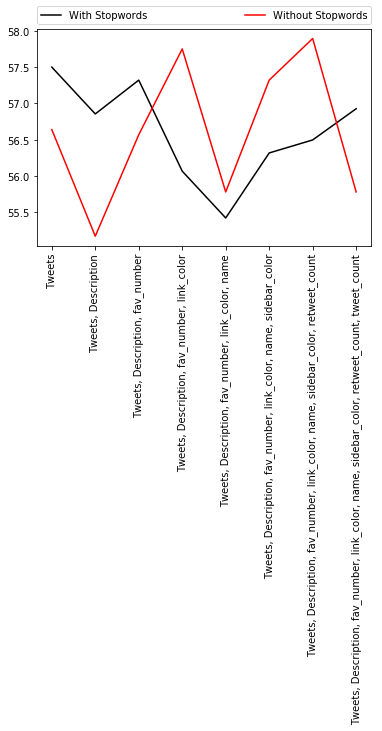

In [16]:


# Plot outputs
x_list=[]
y_list=[]
y_list1=[]
x_list1=[1,2,3,4,5,6,7,8]
i=0
for item in accuracy.items():
    x_list.append(item[0])
    y_list.append(item[1])
for item in accuracy_stopwords.items():
    #x_list.append(item[0])
    y_list1.append(item[1])
#print(accuracy.keys())
stopwords = plt.plot(x_list1, y_list,  color='black',label = 'With Stopwords')
no_stopwords = plt.plot(x_list1, y_list1,  color='red',label = 'Without Stopwords')
plt.xticks(x_list1,x_list,rotation = 'vertical')
#plt.legend([no_stopwords, stopwords], ['Line Up', 'Line Down'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
plt.show()

## Desicion Trees

In desicion trees, all data need to be converted in numeric form so tweet and description features were removed from the data set. As each instance would be a unique entry and that would not give us the accurate results.
All the other text columns like name, sidebar color, link color are transformed into integers by using **Label encoder**

In [17]:
data_DT = pd.read_csv('gender-classifier.csv',encoding = "ISO-8859-1")
#data_DT['gender']

In [19]:

le = preprocessing.LabelEncoder()

data_DT.loc[:,'link_color'] = le.fit_transform(data_DT.loc[:,'link_color']) #link color
data_DT.loc[:,'name'] = le.fit_transform(data_DT.loc[:,'name']) #name
data_DT.loc[:,'sidebar_color'] = le.fit_transform(data_DT.loc[:,'sidebar_color']) #sidebar color


In [20]:
Features_DT = ['fav_number','link_color','name','retweet_count','sidebar_color','tweet_count']
data_confident_DT = data_DT[data_DT['gender:confidence']==1]
data_confident_DT.loc[:,'gender'] = le.fit_transform(data_confident_DT.loc[:,'gender']) 

C:\Users\kashi\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



With Decision tree we get accuracy of about 50% which is just a coin-toss. so I have used some pre-pruning methods to check if the accuracy increases. Below are the few techniques that I implemented with the results recieved:

*  Depth = 5 : In this technique accuracy increased a little and I got maximum accuracy of 54%
*  Depth = 3 : In this technique the highest accuracy that the model showed was 55%, a little better than the depth 5
*  Min leaf sample = 7 : This technique didn't help in increasing the accuracy. It was just 50% in this.


In [22]:
# Decision tree implementation without any pre-pruning technique
accuracy_DT={}
for i in range(1,len(Features_DT)+1):
    #data_confident_DT['all'] = data_confident_DT.filter(Features_DT[:i], axis=1)
    #vectorizer = CountVectorizer()
    #x = vectorizer.fit_transform(data_confident['all'])
    #encoder = LabelEncoder()
    #y = encoder.fit_transform(data_confident['gender'])
    x_train, x_test, y_train, y_test = train_test_split(data_confident_DT.loc[:,Features_DT[:i]],    # predictive features
                                                    data_confident_DT.loc[:,'gender'], test_size=0.2)
    tree_model = tree.DecisionTreeClassifier()
    tree_model = tree_model.fit(x_train, y_train)
    #print(Features[:j])
    accuracy_DT[', '.join(Features_DT[:i])] = tree_model.score(x_test, y_test)*100
for item in accuracy_DT.items():
    print (item[0],"   ",item[1])

fav_number     46.6618808327
fav_number, link_color     49.8923187365
fav_number, link_color, name     49.8923187365
fav_number, link_color, name, retweet_count     50.3230437904
fav_number, link_color, name, retweet_count, sidebar_color     50.7537688442
fav_number, link_color, name, retweet_count, sidebar_color, tweet_count     51.1844938981


In [23]:
accuracy_DT_depth5={}
for i in range(1,len(Features_DT)+1):
    #data_confident_DT['all'] = data_confident_DT.filter(Features_DT[:i], axis=1)
    #vectorizer = CountVectorizer()
    #x = vectorizer.fit_transform(data_confident['all'])
    #encoder = LabelEncoder()
    #y = encoder.fit_transform(data_confident['gender'])
    x_train, x_test, y_train, y_test = train_test_split(data_confident_DT.loc[:,Features_DT[:i]],    # predictive features
                                                    data_confident_DT.loc[:,'gender'], test_size=0.2)
    tree_model = tree.DecisionTreeClassifier(max_depth=5)
    tree_model = tree_model.fit(x_train, y_train)
    #print(Features[:j])
    accuracy_DT_depth5[', '.join(Features_DT[:i])] = tree_model.score(x_test, y_test)*100
for item in accuracy_DT_depth5.items():
    print (item[0],"   ",item[1])

fav_number     50.3589375449
fav_number, link_color     52.2613065327
fav_number, link_color, name     54.4149318019
fav_number, link_color, name, retweet_count     53.4099066762
fav_number, link_color, name, retweet_count, sidebar_color     53.2304379038
fav_number, link_color, name, retweet_count, sidebar_color, tweet_count     52.8715003589


In [24]:
accuracy_DT_depth3={}
for i in range(1,len(Features_DT)+1):
    #data_confident_DT['all'] = data_confident_DT.filter(Features_DT[:i], axis=1)
    #vectorizer = CountVectorizer()
    #x = vectorizer.fit_transform(data_confident['all'])
    #encoder = LabelEncoder()
    #y = encoder.fit_transform(data_confident['gender'])
    x_train, x_test, y_train, y_test = train_test_split(data_confident_DT.loc[:,Features_DT[:i]],    # predictive features
                                                    data_confident_DT.loc[:,'gender'], test_size=0.2)
    tree_model = tree.DecisionTreeClassifier(max_depth=5)
    tree_model = tree_model.fit(x_train, y_train)
    #print(Features[:j])
    accuracy_DT_depth3[', '.join(Features_DT[:i])] = tree_model.score(x_test, y_test)*100
for item in accuracy_DT_depth3.items():
    print (item[0],"   ",item[1])

fav_number     50.5025125628
fav_number, link_color     52.6202440775
fav_number, link_color, name     55.5994256999
fav_number, link_color, name, retweet_count     53.1586503948
fav_number, link_color, name, retweet_count, sidebar_color     54.3790380474
fav_number, link_color, name, retweet_count, sidebar_color, tweet_count     54.5944005743


In [25]:
accuracy_DT_minleaf={}
for i in range(1,len(Features_DT)+1):
    #data_confident_DT['all'] = data_confident_DT.filter(Features_DT[:i], axis=1)
    #vectorizer = CountVectorizer()
    #x = vectorizer.fit_transform(data_confident['all'])
    #encoder = LabelEncoder()
    #y = encoder.fit_transform(data_confident['gender'])
    x_train, x_test, y_train, y_test = train_test_split(data_confident_DT.loc[:,Features_DT[:i]],    # predictive features
                                                    data_confident_DT.loc[:,'gender'], test_size=0.2)
    tree_model = tree.DecisionTreeClassifier(min_samples_leaf=7)
    tree_model = tree_model.fit(x_train, y_train)
    #print(Features[:j])
    accuracy_DT_minleaf[', '.join(Features_DT[:i])] = tree_model.score(x_test, y_test) * 100
for item in accuracy_DT_minleaf.items():
    print (item[0],"   ",item[1])

fav_number     47.5233309404
fav_number, link_color     49.9641062455
fav_number, link_color, name     50.0
fav_number, link_color, name, retweet_count     53.2304379038
fav_number, link_color, name, retweet_count, sidebar_color     53.984206748
fav_number, link_color, name, retweet_count, sidebar_color, tweet_count     50.4666188083


By comparing all three techniques, the best accuracy was given by DT with depth 3.

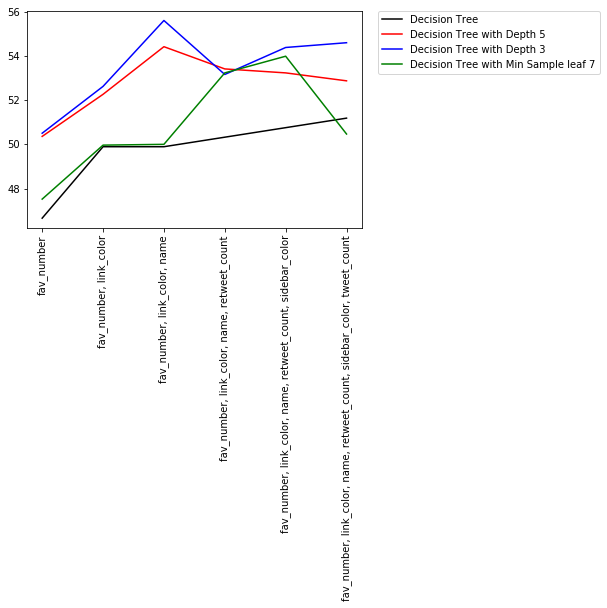

In [27]:


# Plot outputs
x_list=[]
y_list=[]
y_list1=[]
y_list2=[]
y_list3=[]
x_list1=[1,2,3,4,5,6]
i=0
for item,item1,item2,item3 in zip(accuracy_DT.items(),accuracy_DT_depth5.items(),accuracy_DT_depth3.items(),accuracy_DT_minleaf.items()):
    x_list.append(item[0])
    y_list.append(item[1])
    y_list1.append(item1[1])
    y_list2.append(item2[1])
    y_list3.append(item3[1])
DT_model = plt.plot(x_list1, y_list,  color='black',label = 'Decision Tree')
DT_model_depth5 = plt.plot(x_list1, y_list1,  color='red',label = 'Decision Tree with Depth 5')
DT_model_depth3 = plt.plot(x_list1, y_list2,  color='blue',label = 'Decision Tree with Depth 3')
DT_model_minleaf = plt.plot(x_list1, y_list3,  color='green',label = 'Decision Tree with Min Sample leaf 7')
plt.xticks(x_list1,x_list,rotation = 'vertical')
#plt.legend([no_stopwords, stopwords], ['Line Up', 'Line Down'])
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### k-Nearest Neighbours

Implementing k-Nearest neighbours on the same feature set as Naive Bayes, with different values of k as 3,5 and 10.
In k nearset neighbours all the accuracy was less than 50%.

In [30]:

data_NN = pd.read_csv('gender-classifier.csv',encoding = "ISO-8859-1")

In [31]:
data_NN['Tweets'] = [cleaning(s) for s in data['text']]
data_NN['Description'] = [cleaning(s) for s in data['description']]
data_confident_NN = data_NN[data_NN['gender:confidence']==1]
Features_NN = ['Tweets','Description','fav_number','link_color','name','retweet_count','sidebar_color','tweet_count']
k_value=[3,5,10]

In [32]:
accuracy_NN3={}
accuracy_NN5={}
accuracy_NN10={}
accuracy_NN=[accuracy_NN3,accuracy_NN5,accuracy_NN10]
for k, acc in zip(k_value,accuracy_NN):
    for i in range(1,len(Features_NN)+1):
        data_confident_NN['all'] = data_confident_NN.filter(Features_NN[:i], axis=1)
        vectorizer = CountVectorizer()
        x = vectorizer.fit_transform(data_confident_NN['all'])
        encoder = LabelEncoder()
        y = encoder.fit_transform(data_confident['gender'])
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(x_train, y_train)
        #print(Features[:j])
        acc[', '.join(Features_NN[:i])] = neigh.score(x_test, y_test)*100
    print("--------------------------------k=",k,"------------------------------------------")
    for item in acc.items():
        print (item[0],"   ",item[1])

C:\Users\kashi\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



--------------------------------k= 3 ------------------------------------------
Tweets     45.6209619526
Tweets, Description     44.4005743001
Tweets, Description, fav_number     43.1083991385
Tweets, Description, fav_number, link_color     44.0057430007
Tweets, Description, fav_number, link_color, name     44.7954055994
Tweets, Description, fav_number, link_color, name, retweet_count     43.8262742283
Tweets, Description, fav_number, link_color, name, retweet_count, sidebar_color     43.4314429289
Tweets, Description, fav_number, link_color, name, retweet_count, sidebar_color, tweet_count     44.0775305097
--------------------------------k= 5 ------------------------------------------
Tweets     47.0208183776
Tweets, Description     44.3287867911
Tweets, Description, fav_number     44.615936827
Tweets, Description, fav_number, link_color     43.8980617373
Tweets, Description, fav_number, link_color, name     45.3697056712
Tweets, Description, fav_number, link_color, name, retweet_coun

In [ ]:
print(accuracy_NN3)
print(accuracy_NN5)
print(accuracy_NN10)

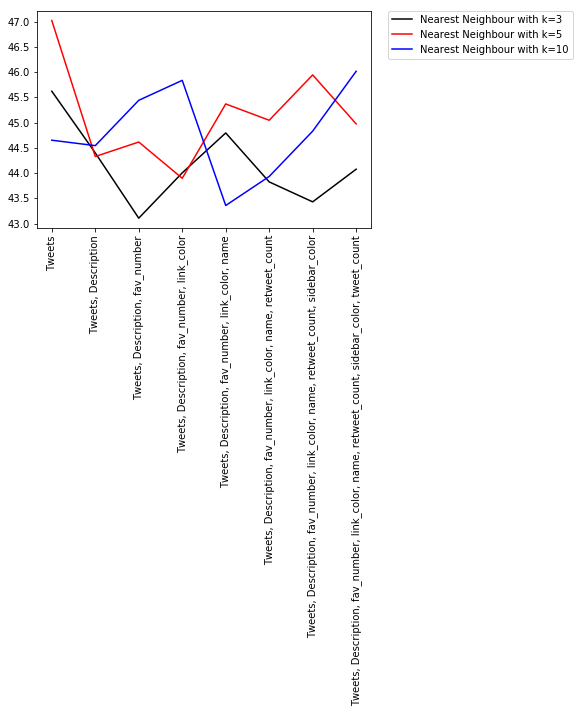

In [33]:
x_list=[]
y_list=[]
y_list1=[]
y_list2=[]
y_list3=[]
x_list1=[1,2,3,4,5,6,7,8]
i=0
for item,item1,item2 in zip(accuracy_NN3.items(),accuracy_NN5.items(),accuracy_NN10.items()):
    x_list.append(item[0])
    y_list.append(item[1])
    y_list1.append(item1[1])
    y_list2.append(item2[1])
NN3_model = plt.plot(x_list1, y_list,  color='black',label = 'Nearest Neighbour with k=3')
NN5_model = plt.plot(x_list1, y_list1,  color='red',label = 'Nearest Neighbour with k=5')
NN10_model = plt.plot(x_list1, y_list2,  color='blue',label = 'Nearest Neighbour with k=10')
#DT_model_minleaf = plt.plot(x_list1, y_list3,  color='green',label = 'Decision Tree with Min Sample leaf 7')
plt.xticks(x_list1,x_list,rotation = 'vertical')
#plt.legend([no_stopwords, stopwords], ['Line Up', 'Line Down'])
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Comparing k nearest neighbours with Decision Tree

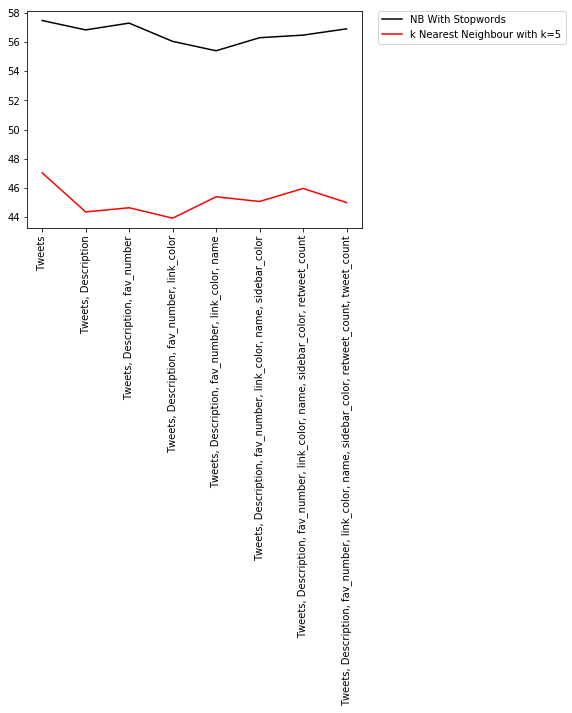

In [35]:
x_list=[]
y_list=[]
y_list1=[]
x_list1=[1,2,3,4,5,6,7,8]
i=0
for item,item1 in zip(accuracy.items(),accuracy_NN5.items()):
    x_list.append(item[0])
    y_list.append(item[1])
    y_list1.append(item1[1])
stopwords = plt.plot(x_list1, y_list,  color='black',label = 'NB With Stopwords')
NN5_model = plt.plot(x_list1, y_list1,  color='red',label = 'k Nearest Neighbour with k=5')
#NN10_model = plt.plot(x_list1, y_list2,  color='blue',label = 'Nearest Neighbour with k=10')
#DT_model_minleaf = plt.plot(x_list1, y_list3,  color='green',label = 'Decision Tree with Min Sample leaf 7')
plt.xticks(x_list1,x_list,rotation = 'vertical')
#plt.legend([no_stopwords, stopwords], ['Line Up', 'Line Down'])
#plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

All the models are giving accuracy of about 50-60%. To analyze further, I analysed the most common words used by males and females, in random tweets and the description of their profile. It shows that the set of most common 20 words used by males and females are almost same with just the order of words being different. 

In [44]:
data_wc = pd.read_csv('gender-classifier.csv',encoding = "ISO-8859-1")
data_wc['Tweets'] = [cleaning(s) for s in data_wc['text']]
data_wc['Description'] = [cleaning(s) for s in data_wc['description']]


Male_wc = data_wc[data_wc['gender'] == 'male']
Female_wc = data_wc[data_wc['gender'] == 'female']
Brand_wc = data_wc[data_wc['gender'] == 'brand']


In [45]:
Male_Words_wc = pd.Series(' '.join(Male_wc['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20] # 20 most common words
Female_Words_wc = pd.Series(' '.join(Female_wc['Tweets'].astype(str)).lower().split(" ")).value_counts()[:20] # 20 most common words
Brand_Words_wc = pd.Series(' '.join(Brand_wc['Tweets'].astype(str)).lower().split(" ")).value_counts()[:10] # 10 most common words
#print(Male_Words_wc)
#print("******************************************************************")
#print(Female_Words_wc)
#print("******************************************************************")
#print (Brand_Words_wc)

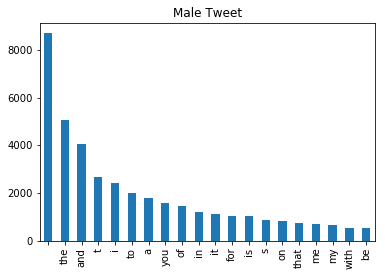

In [74]:
Male_Words_wc.plot(kind="bar",title="Male Tweet")

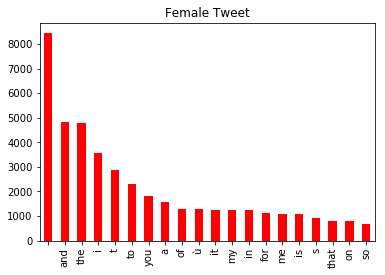

In [75]:
Female_Words_wc.plot(kind="bar",color="red",title="Female Tweet")

In [60]:
Male_Words_wc_D = pd.Series(' '.join(Male_wc['Description'].astype(str)).lower().split(" ")).value_counts()[:20] # 20 most common words
Female_Words_wc_D = pd.Series(' '.join(Female_wc['Description'].astype(str)).lower().split(" ")).value_counts()[:20] # 20 most common words
Brand_Words_wc_D = pd.Series(' '.join(Brand_wc['Description'].astype(str)).lower().split(" ")).value_counts()[:10] # 10 most common words
print(Male_Words_wc_D.tolist())
print(Male_Words_wc_D.index.values.tolist())
#print("******************************************************************")
#print(Female_Words_wc_D)
#print("******************************************************************")
#print (Brand_Words_wc_D)

[4173, 1714, 1647, 1550, 1350, 1185, 928, 840, 725, 714, 713, 691, 648, 536, 478, 476, 440, 396, 391, 365]
['', 'and', 'i', 'the', 'of', 'a', 'to', 'my', 'nan', 't', 'in', 'for', 'you', 'is', 'm', 'êû', 'me', 'on', 's', 'û']


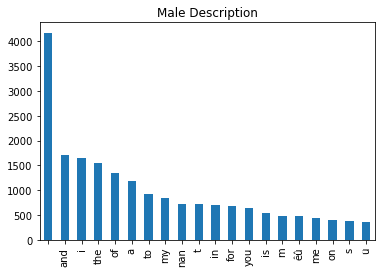

In [76]:
Male_Words_wc_D.plot(kind="bar",title="Male Description")


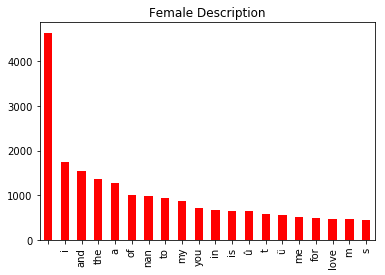

In [78]:
Female_Words_wc_D.plot(kind="bar", color="red",title="Female Description")

In [65]:
stop = set(nltk.corpus.stopwords.words('english'))
data_wc['Tweets_no'] = data_wc['Tweets'].str.lower().str.split()
data_wc['Tweets_no'] = data_wc['Tweets_no'].apply(lambda x : [item for item in x if item not in stop])


data.gender.value_counts()
Male_no = data_wc[data_wc['gender'] == 'male']
Female_no = data_wc[data_wc['gender'] == 'female']
Brand_no = data_wc[data_wc['gender'] == 'brand']
Male_Words_no = pd.Series(' '.join(Male_no['Tweets_no'].astype(str)).lower().split(" ")).value_counts()[:20] # 20 most common words
Female_Words_no = pd.Series(' '.join(Female_no['Tweets_no'].astype(str)).lower().split(" ")).value_counts()[:20] # 20 most common words
Brand_Words_no = pd.Series(' '.join(Brand_no['Tweets_no'].astype(str)).lower().split(" ")).value_counts()[:10] # 10 most common words
print(Male_Words_no)
print("******************************************************************")
print(Female_Words_no)
#print("******************************************************************")
#print (Brand_Words)

'ù',         365
'like',      323
'get',       309
'm',         269
'û',         235
'one',       209
'new',       193
'time',      192
'go',        185
'love',      179
'people',    155
'day',       153
'good',      152
'see',       151
'amp',       149
'know',      149
're',        148
'would',     140
'back',      138
'think',     135
dtype: int64
******************************************************************
'ù',         1025
'm',          442
'like',       405
'get',        314
'one',        271
'day',        254
'ù']          248
'love',       243
'go',         241
'û',          235
'time',       201
'amp',        196
'people',     194
're',         192
'âù',         189
'know',       175
'last',       171
'new',        170
'got',        161
'back',       156
dtype: int64


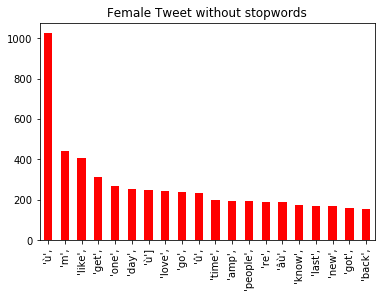

In [84]:
Female_Words_no.plot(kind="bar", color="red",title="Female Tweet without stopwords")

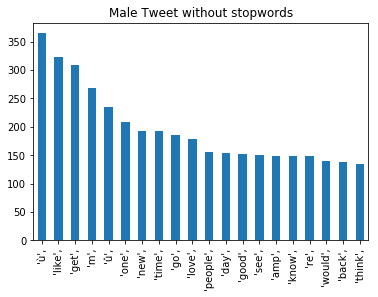

In [79]:
Male_Words_no.plot(kind="bar",title="Male Tweet without stopwords")

In [69]:
stop = set(nltk.corpus.stopwords.words('english'))
data_wc['Description_no'] = data_wc['Description'].str.lower().str.split()
data_wc['Description_no'] = data_wc['Description_no'].apply(lambda x : [item for item in x if item not in stop])


data.gender.value_counts()
Male_no_D= data_wc[data_wc['gender'] == 'male']
Female_no_D = data_wc[data_wc['gender'] == 'female']
Brand_no_D = data_wc[data_wc['gender'] == 'brand']
Male_Words_no_D = pd.Series(' '.join(Male['Description_no'].astype(str)).lower().split(" ")).value_counts()[:20] # 20 most common words
Female_Words_no_D = pd.Series(' '.join(Female['Description_no'].astype(str)).lower().split(" ")).value_counts()[:20] # 20 most common words
Brand_Words_no_D = pd.Series(' '.join(Brand['Description_no'].astype(str)).lower().split(" ")).value_counts()[:10] # 10 most common words
#print(Male_Words_no_D)
#print("******************************************************************")
#print(Female_Words_no_D)
#print("******************************************************************")
#print (Brand_Words_no_D)

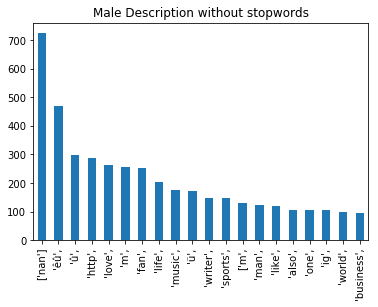

In [80]:
Male_Words_no_D.plot(kind="bar",title="Male Description without stopwords")

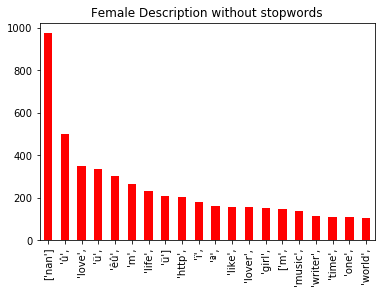

In [83]:
Female_Words_no_D.plot(kind="bar",color="red",title="Female Description without stopwords")

## Result

Maximum accuracy was obtained with the simplest of model i.e Naive Bayes without the remaval of stopwords. That is about 57.8%

## Future improvements

Some more refinement of data can be done in order to increase the accuracy of model and get a better prediction model

* We have a link of profile image in our dataset, we can analyse the image and based on that we can predict the gender, which might increase the accuracy. For e.g., if we can analyse the image and mark distinct features like visible jwellery may be categorized as female or facial hairs(beard and mustaches) can be classified as males.

* Different models like support vector machines or neural networks may be tried to give better accuracy.

## References

- Data Science From Scratch, Joel Grus
- Fundamentals of Machine learning, John D. Kelleher, Brian Mac Namee, Aoife D’Archy
- Kaggle.com
- matplotlib.org
